Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
survey = pd.read_csv('../data/survey.csv')
survey.head()

,rownames,Sex,Wr.Hnd,NW.Hnd,W.Hnd,Fold,Pulse,Clap,Exer,Smoke,Height,M.I,Age
0,1,Female,18.5,18.0,Right,R on L,92.0,Left,Some,Never,173.0,Metric,18.250
1,2,Male,19.5,20.5,Left,R on L,104.0,Left,NaN,Regul,177.8,Imperial,17.583
2,3,Male,18.0,13.3,Right,L on R,87.0,Neither,NaN,Occas,NaN,NaN,16.917
3,4,Male,18.8,18.9,Right,R on L,NaN,Neither,NaN,Never,160.0,Metric,20.333
4,5,Male,20.0,20.0,Right,Neither,35.0,Right,Some,Never,165.0,Metric,23.667


In [3]:
survey.info()
survey['Sex'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rownames  237 non-null    int64  
 1   Sex       236 non-null    object 
 2   Wr.Hnd    236 non-null    float64
 3   NW.Hnd    236 non-null    float64
 4   W.Hnd     236 non-null    object 
 5   Fold      237 non-null    object 
 6   Pulse     192 non-null    float64
 7   Clap      236 non-null    object 
 8   Exer      213 non-null    object 
 9   Smoke     236 non-null    object 
 10  Height    209 non-null    float64
 11  M.I       209 non-null    object 
 12  Age       237 non-null    float64
dtypes: float64(5), int64(1), object(7)
memory usage: 24.2+ KB


Sex
Female    118
Male      118
Name: count, dtype: int64

In [6]:
# unique values in categorical columns
def unique_value_counts(df):
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        print(f"Column: {col}")
        print(df[col].value_counts(dropna=False))
        print('-' * 30)

unique_value_counts(survey)

Column: Sex
Sex
Female    118
Male      118
NaN         1
Name: count, dtype: int64
------------------------------
Column: W.Hnd
W.Hnd
Right    218
Left      18
NaN        1
Name: count, dtype: int64
------------------------------
Column: Fold
Fold
R on L     120
L on R      99
Neither     18
Name: count, dtype: int64
------------------------------
Column: Clap
Clap
Right      147
Neither     50
Left        39
NaN          1
Name: count, dtype: int64
------------------------------
Column: Exer
Exer
Freq    115
Some     98
NaN      24
Name: count, dtype: int64
------------------------------
Column: Smoke
Smoke
Never    189
Occas     19
Regul     17
Heavy     11
NaN        1
Name: count, dtype: int64
------------------------------
Column: M.I
M.I
Metric      141
Imperial     68
NaN          28
Name: count, dtype: int64
------------------------------


In [ ]:
# Calculate te percentage representation of left-handers, non-smokers, and those not doing exercise by percentage
def calc_percentage(df, column, value):
    return round((df[column] == value).sum() / len(df) * 100, 2)

left_handed_pct = calc_percentage(survey, 'W.Hnd', 'Left')
non_smokers_pct = calc_percentage(survey, 'Smoke', 'Never')
non_exercisers_pct = round(survey['Exer'].isna().sum() / len(survey) * 100, 2)

print(f"Left-handed: {left_handed_pct}%")
print(f"Non-smokers: {non_smokers_pct}%")
print(f"Non-exercisers: {non_exercisers_pct}%")


Left-handed: 7.59%
Non-smokers: 79.75%
Non-exercisers: 10.13%


In [ ]:
# Calculate the average height and pulse rates of the students
def calculate_averages(df):
    avg_height = df['Height'].mean()
    avg_pulse = df['Pulse'].mean()
    return avg_height, avg_pulse

avg_height, avg_pulse = calculate_averages(survey)

print(f"Average Height: {avg_height:.2f} cm")
print(f"Average Pulse: {avg_pulse:.2f} bpm")

Average Height: 172.38 cm
Average Pulse: 74.15 bpm


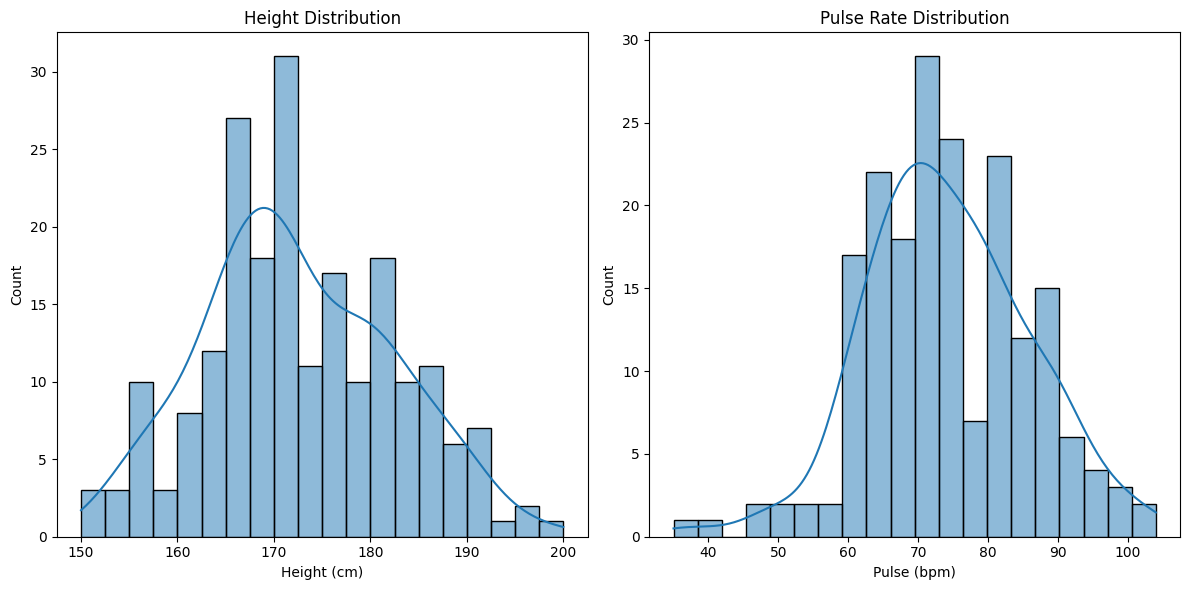

In [23]:
# Plot distribution for height and pulse rates
def plot_height_pulse(df):
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    sns.histplot(df['Height'], kde=True, bins=20)
    plt.title('Height Distribution')
    plt.xlabel('Height (cm)')
    
    plt.subplot(1, 2, 2)
    sns.histplot(df['Pulse'], kde=True, bins=20)
    plt.title('Pulse Rate Distribution')
    plt.xlabel('Pulse (bpm)')
    
    plt.tight_layout()
    plt.show()
plot_height_pulse(survey)

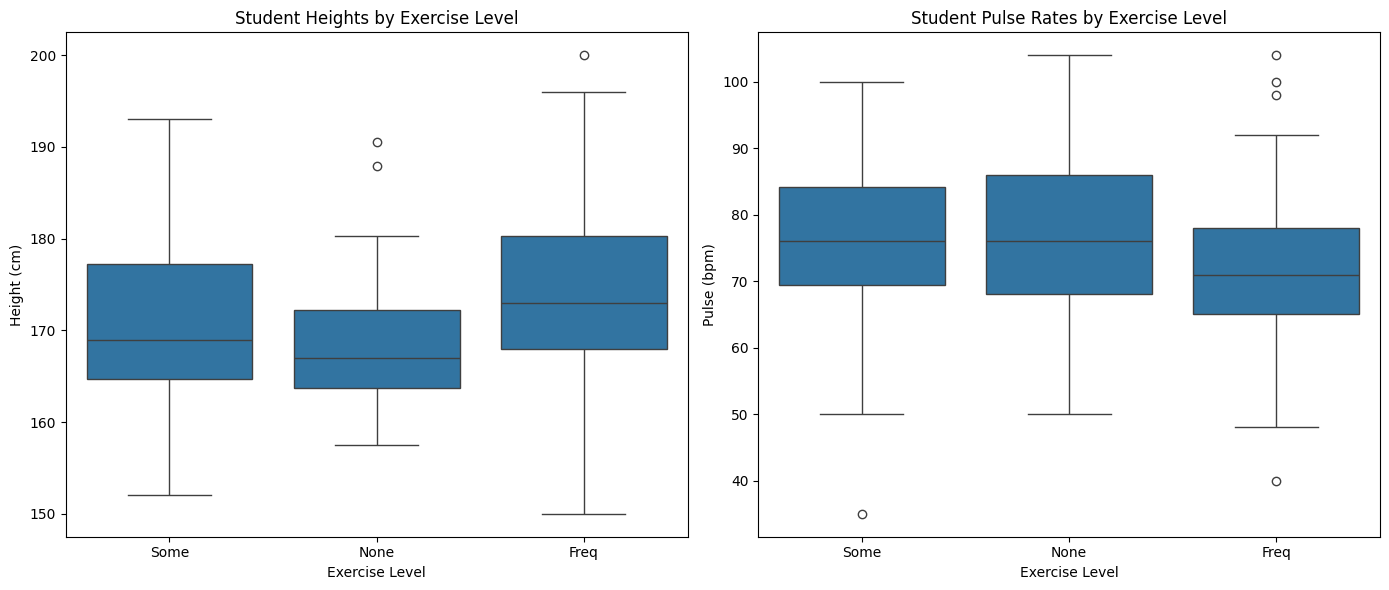

In [24]:
# Plot boxplots to illustrate the heights and pulse rates of students, treating NaN in 'Exer' as 'No Exercise'
def plot_boxplots_by_exercise_nan_as_none(df):
    df_plot = df.copy()
    df_plot['Exer'] = df_plot['Exer'].fillna('None')
    
    plt.figure(figsize=(14, 6))

    # Boxplot for Height by Exercise level
    plt.subplot(1, 2, 1)
    sns.boxplot(x='Exer', y='Height', data=df_plot)
    plt.title('Student Heights by Exercise Level')
    plt.xlabel('Exercise Level')
    plt.ylabel('Height (cm)')

    # Boxplot for Pulse by Exercise level
    plt.subplot(1, 2, 2)
    sns.boxplot(x='Exer', y='Pulse', data=df_plot)
    plt.title('Student Pulse Rates by Exercise Level')
    plt.xlabel('Exercise Level')
    plt.ylabel('Pulse (bpm)')

    plt.tight_layout()
    plt.show()

plot_boxplots_by_exercise_nan_as_none(survey)

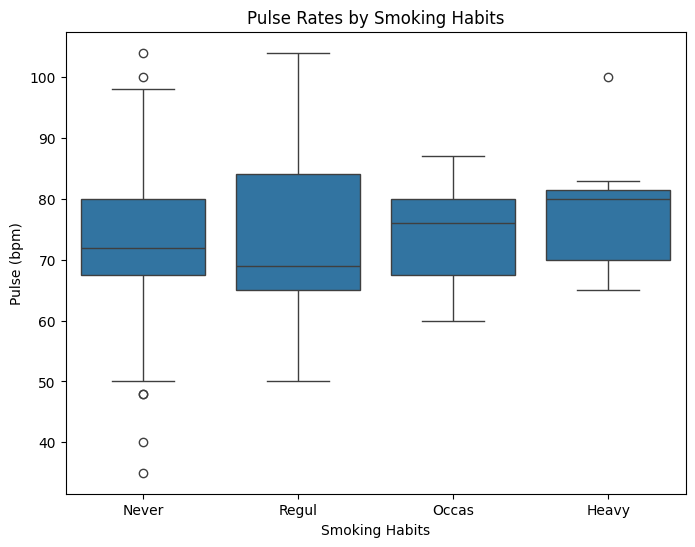

In [20]:
# Plot boxplots for pulse rates and smoking habits
def plot_pulse_smoking(df):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Smoke', y='Pulse', data=df)
    plt.title('Pulse Rates by Smoking Habits')
    plt.xlabel('Smoking Habits')
    plt.ylabel('Pulse (bpm)')
    plt.show()
plot_pulse_smoking(survey)  

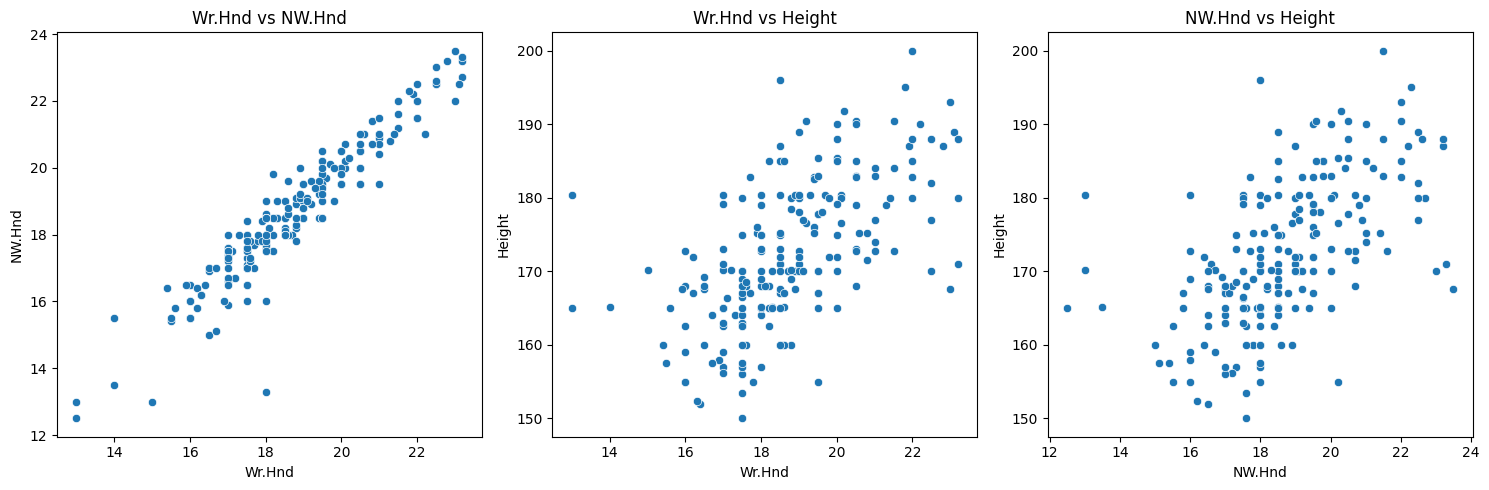

In [22]:
# plot scatter plots 
def plot_pairwise_scatter(df):
    cols = ['Wr.Hnd', 'NW.Hnd', 'Height']
    plt.figure(figsize=(15, 5))
    plot_num = 1
    for i in range(len(cols)):
        for j in range(i + 1, len(cols)):
            plt.subplot(1, 3, plot_num)
            sns.scatterplot(x=cols[i], y=cols[j], data=df)
            plt.xlabel(cols[i])
            plt.ylabel(cols[j])
            plt.title(f'{cols[i]} vs {cols[j]}')
            plot_num += 1
    plt.tight_layout()
    plt.show()

plot_pairwise_scatter(survey)